# FitzHugh-Nagumo

In [3]:
import sympy as sp
a,b,c=sp.symbols('a,b,c')
V = sp.Function("V")(a,b,c)
R = sp.Function("R")(a,b,c)
dV = c*(V-V**3/3+R)
dR = -(V-a+b*R)/c
lista_parametara = [a, b, c]

N_P = len(lista_parametara)
lista_funkcija = [V,R]
lista_jednadzbi  = [dV,dR]
lista_derivacija = [[p] for p in lista_parametara]+[[lista_parametara[i],lista_parametara[j]] for i in range(N_P) for j in range(i,N_P)]

sp.init_printing()
lista = []
i = 0
for f in lista_funkcija:
    lista.append([str(f),'y[%d]'%i])
    i+=1

for a in lista_derivacija:
    for f in lista_funkcija:
        lista.append([str(sp.Derivative(f,*a,evaluate=True)),'y[%d]'%i])
        i+=1

for k in ['cos','sin']:
    lista.append([k,"np."+k])
def zamjena(string, repl):
    st = string
    for r in repl[::-1]:
        st = st.replace(*r)
    return st
i = 0
for f in lista_jednadzbi:
    print(zamjena(str(f),lista),end=',')
    i+=1
print()
for a in lista_derivacija:
    for f in lista_jednadzbi:
        print(zamjena(str(sp.Derivative(f,*a,evaluate=True)),lista),end=',')
        i+=1
    print(" #",str(a))
print()
print()
for a in lista_derivacija:
    for i in range(len(lista_jednadzbi)):
        f = lista_jednadzbi[i]
        lhs = r"\frac{\dif}{\dif t}" +sp.latex(sp.Derivative(lista_funkcija[i],*a,evaluate=True))
        string = lhs+"&="+sp.latex(sp.Derivative(f,*a,evaluate=True))+r"\\"
        print(zamjena(string,[[r"{\left (a,b,c \right )}",""]]))

c*(y[1] - y[0]**3/3 + y[0]),(a - b*y[1] - y[0])/c,
c*(-y[0]**2*y[2] + y[3] + y[2]),(-b*y[3] - y[2] + 1)/c, # [a]
c*(-y[0]**2*y[4] + y[5] + y[4]),(-b*y[5] - y[1] - y[4])/c, # [b]
c*(-y[0]**2*y[6] + y[7] + y[6]) + y[1] - y[0]**3/3 + y[0],(-b*y[7] - y[6])/c - (a - b*y[1] - y[0])/c**2, # [c]
-c*(y[0]**2*y[8] + 2*y[0]*y[2]**2 - y[9] - y[8]),-(b*y[9] + y[8])/c, # [a, a]
-c*(y[0]**2*y[10] + 2*y[0]*y[2]*y[4] - y[11] - y[10]),-(b*y[11] + y[3] + y[10])/c, # [a, b]
-c*(y[0]**2*y[12] + 2*y[0]*y[2]*y[6] - y[13] - y[12]) - y[0]**2*y[2] + y[3] + y[2],(-b*y[13] - y[12] + (b*y[3] + y[2] - 1)/c)/c, # [a, c]
-c*(y[0]**2*y[14] + 2*y[0]*y[4]**2 - y[15] - y[14]),-(b*y[15] + 2*y[5] + y[14])/c, # [b, b]
-c*(y[0]**2*y[16] + 2*y[0]*y[4]*y[6] - y[17] - y[16]) - y[0]**2*y[4] + y[5] + y[4],(-b*y[17] - y[7] - y[16] + (b*y[5] + y[1] + y[4])/c)/c, # [b, c]
-c*(y[0]**2*y[18] + 2*y[0]*y[6]**2 - y[19] - y[18]) - 2*y[0]**2*y[6] + 2*y[7] + 2*y[6],(-b*y[19] - y[18] + 2*(b*y[7] + y[6])/c - 2*(-a + b*y[1] + y[0])/c**2)/c, # 

In [22]:
%run "MBAM_codes.py"
class model(MBAM_odeint):
    def __init__(self,**odeint_kwargs):
        self.IC     = [-1,1]
        
        self.T      = np.linspace(0,10,100)
        self.xlim   = [0.001,2]
        self.ylim   = [0.001,2]
        self.θbf    = [1.,1.,1.]
        self._title = r'FitzHugh_Nagumo/FitzHugh_Nagumo'
        self.N_parameters = 3
        self.N_equations  = 2
        num = int(self.N_equations*self.N_parameters*(self.N_parameters+3)/2)
        self.INI    = np.array(self.IC+num*[0.])
        MBAM_odeint.__init__(self, self._function, self.T, 
                             self.INI,self.N_parameters, 
                             self.N_equations,**odeint_kwargs)
    def _function(self,y,t,θ):
        a,b,c = θ
        return np.array([c*(y[1] - y[0]**3/3 + y[0]),(a - b*y[1] - y[0])/c,
c*(-y[0]**2*y[2] + y[3] + y[2]),(-b*y[3] - y[2] + 1)/c, # [a]
c*(-y[0]**2*y[4] + y[5] + y[4]),(-b*y[5] - y[1] - y[4])/c, # [b]
c*(-y[0]**2*y[6] + y[7] + y[6]) + y[1] - y[0]**3/3 + y[0],(-b*y[7] - y[6])/c - (a - b*y[1] - y[0])/c**2, # [c]
-c*(y[0]**2*y[8] + 2*y[0]*y[2]**2 - y[9] - y[8]),-(b*y[9] + y[8])/c, # [a, a]
-c*(y[0]**2*y[10] + 2*y[0]*y[2]*y[4] - y[11] - y[10]),-(b*y[11] + y[3] + y[10])/c, # [a, b]
-c*(y[0]**2*y[12] + 2*y[0]*y[2]*y[6] - y[13] - y[12]) - y[0]**2*y[2] + y[3] + y[2],(-b*y[13] - y[12] + (b*y[3] + y[2] - 1)/c)/c, # [a, c]
-c*(y[0]**2*y[14] + 2*y[0]*y[4]**2 - y[15] - y[14]),-(b*y[15] + 2*y[5] + y[14])/c, # [b, b]
-c*(y[0]**2*y[16] + 2*y[0]*y[4]*y[6] - y[17] - y[16]) - y[0]**2*y[4] + y[5] + y[4],(-b*y[17] - y[7] - y[16] + (b*y[5] + y[1] + y[4])/c)/c, # [b, c]
-c*(y[0]**2*y[18] + 2*y[0]*y[6]**2 - y[19] - y[18]) - 2*y[0]**2*y[6] + 2*y[7] + 2*y[6],(-b*y[19] - y[18] + 2*(b*y[7] + y[6])/c - 2*(-a + b*y[1] + y[0])/c**2)/c, # [c, c]
                     ])
    def simulate(self):
        y, _, g, _, _, _ = self.find_solutions(self.θbf)
        V0               = self.metric_eigenvector(g)
        init = np.append(self.θbf,V0)
        ys  =y+np.random.normal(0,1,self.N_equations*self.T.size).reshape(self.T.size,self.N_equations)
        r = ys-y
        self._ys = ys
        self._y  = y
        self._rs = r
        self.init = init
        self._V0  = V0
M = model()
M.simulate()

τ=np.linspace(0,10,100)
MBAM = M.run_MBAM(M.init, τ)



/home/ktisanic/anaconda3/lib/python3.5/site-packages/scipy/integrate/odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


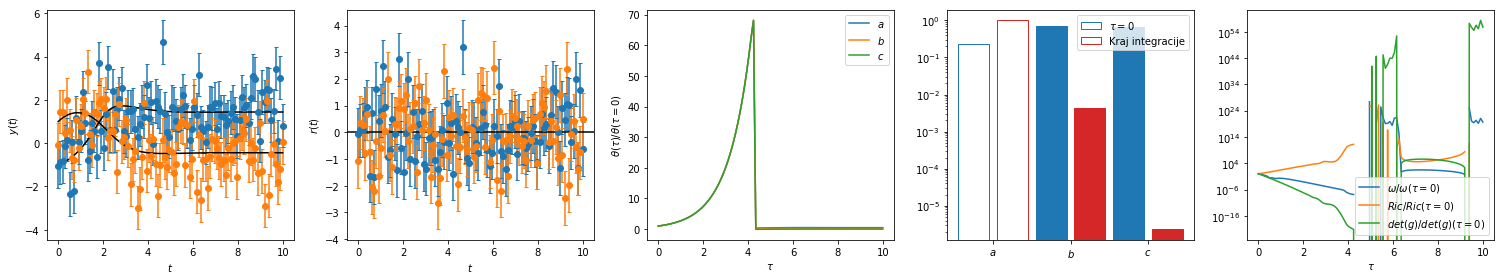

In [23]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=['$a$','$b$',r'$c$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u]/MBAM.θ[0,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0/MBAM.ω0[0],label=r'$\omega/\omega(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.R/MBAM.R[0],label=r'$Ric/Ric(\tau=0)$')
ax[4].plot(MBAM.τ,MBAM.detg/MBAM.detg[0],label=r'$det(g)/det(g)(\tau=0)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)/\theta(\tau=0)$')
ax[4].set_yscale('log')
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model_normalized.pdf')

/home/ktisanic/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2144: RuntimeWarning: invalid value encountered in greater_equal
  condition = (xf >= v1) & (xf <= v2)
/home/ktisanic/anaconda3/lib/python3.5/site-packages/numpy/ma/core.py:2144: RuntimeWarning: invalid value encountered in less_equal
  condition = (xf >= v1) & (xf <= v2)


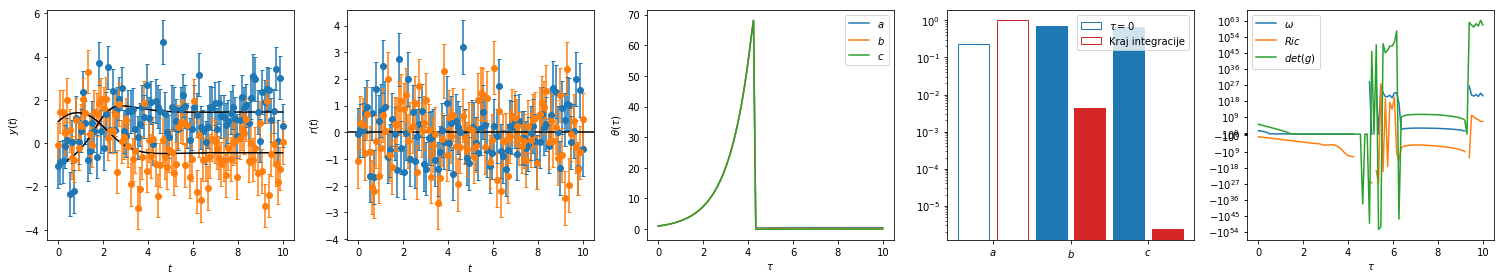

In [24]:
f,ax = plt.subplots(1,5,figsize=(5*4+1,4))
plabels=['$a$','$b$',r'$c$']
M.plot_data(ax[:2],M.T,M._ys,M._rs,M._y)
M.bar_plot(ax[3],M._V0,M.metric_eigenvector(MBAM.g[-1]),plabels=plabels,
                      labels=[r'$\tau=0$','Kraj integracije'],colors=['C0','C3'])

for u in range(len(plabels)):
    ax[2].plot(MBAM.τ,MBAM.θ[:,u],label=plabels[u])

ax[4].plot(MBAM.τ,MBAM.ω0,label=r'$\omega$')
ax[4].plot(MBAM.τ,MBAM.R,label=r'$Ric$')
ax[4].plot(MBAM.τ,MBAM.detg,label=r'$det(g)$')

ax[2].legend()
ax[2].set_ylabel(r'$\theta(\tau)$')

ax[4].set_yscale('symlog')
ax[4].set_xlabel(r'$\tau$')
ax[2].set_xlabel(r'$\tau$')
ax[4].legend()
f.tight_layout()
f.savefig(M._title+'_model.pdf')